In [1]:
#!pip install apafib

In [2]:
import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB

from sklearn.model_selection import GridSearchCV

from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.classifier import precision_recall_curve

import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
pd.set_option('display.precision', 3)

In [3]:
from apafib import load_MNIST
X_train, X_test, y_train, y_test = load_MNIST()

In [4]:
X_train.shape

(4514, 784)

Defino dos funciones que permiten visualizar los digito. La primera te enseña el numero de digitos que le pidas, por orden. La segunda te enseña los primeros 50 digitos que especifiques (4, 7 o 9).

In [5]:
import math
def show_images(X, num_images):
    n = int(math.sqrt(len(X[1])))
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X[digit_num].reshape(n,n)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis


In [6]:
def show_images_by_digit(X, digit_to_see):
    n = int(math.sqrt(len(X[1])))
    if digit_to_see in [4, 7, 9]:
        indices = np.where(y_train == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50): 
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = X[indices[0][digit_num]].reshape(n,n)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis

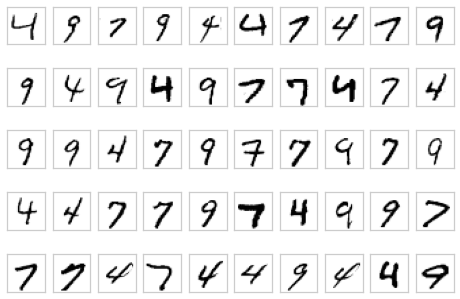

In [7]:
show_images(X_train, 50)

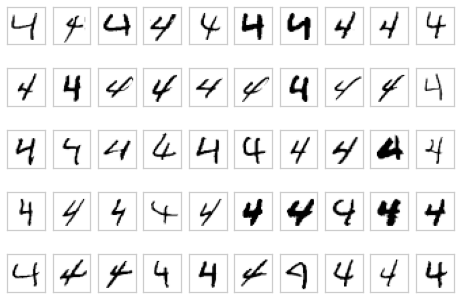

In [8]:
show_images_by_digit(X_train, 4)

a) Los datos corresponden a imágenes de 28 × 28 píxeles en niveles de gris. Estos ya están
convertidos a vectores y normalizados a la escala [0,1]. Aplica PCA a los datos de entrenamiento y represéntalos en 2D. ¿Se puede ver separabilidad entre las clases? Comenta el
resultado

In [37]:
from sklearn.decomposition import PCA
myPCA = PCA().fit(X_train);

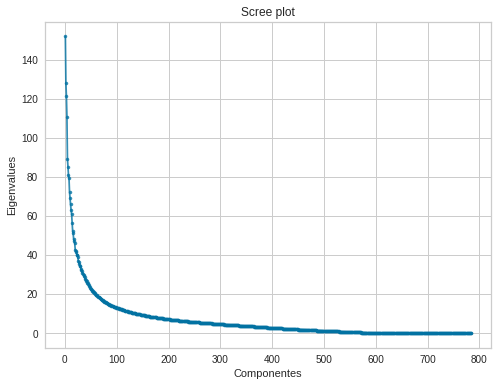

In [38]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.')
y_label = plt.ylabel('Eigenvalues')
x_label = plt.xlabel('Componentes')
plt.title('Scree plot')
plt.show()

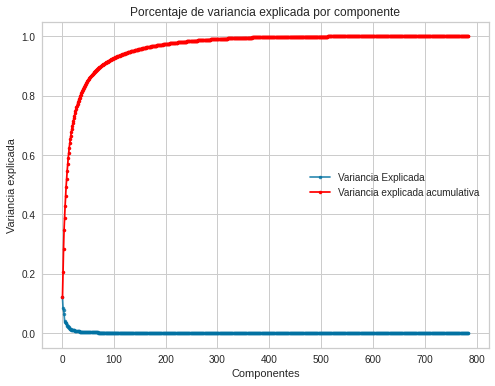

In [39]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada")
y_label = plt.ylabel('Variancia explicada')
x_label = plt.xlabel('Componentes')
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa")
plt.legend()
plt.title('Porcentaje de variancia explicada por componente')
plt.show()

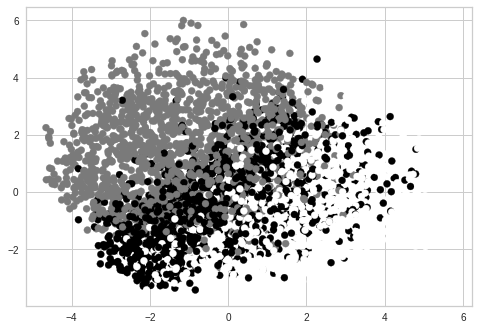

In [40]:
plt.scatter(myPCA.transform(X_train)[:,1], myPCA.transform(X_train)[:,2], c=y_train)
plt.show()

Se puede ver que sigue exitiendo una clara separabilidad entre las tres clases (4, 7 y 9). Obervamos también que con pocos componentes explicamos un 80% de la varianza.

b) Asumiendo que los píxeles son independientes y se distribuyen de manera gausiana, ajusta
un modelo Naïve Bayes gausiano y evalúa la calidad del modelo. Cuanto más acerquemos
los datos a lo que supone el modelo que ajustamos probablemente obtengamos un mejor
resultado. Una posibilidad es binarizar la matriz de datos usando un límite de 0.5 y asumir que los píxeles siguen una distribución de Bernoulli. Transforma los datos a binarios
utilizando la función Binarizer y ajusta un Naïve Bayes Bernoulli. Evalúa la calidad del
modelo y comenta los resultados.

In [41]:
gnb = GaussianNB()
print(np.mean(cross_val_score(gnb,X_train,y_train,cv=10)))

0.5919328728685518


In [42]:
gnb_model = GaussianNB().fit(X_train, y_train)

print('Priors:', gnb_model.class_prior_)

Priors: [0.31590607 0.34847142 0.33562251]


In [43]:
print(classification_report(gnb_model.predict(X_test), y_test,target_names=['4', '7', '9']))

              precision    recall  f1-score   support

           4       0.43      0.92      0.59       118
           7       0.29      0.90      0.44        80
           9       0.97      0.45      0.61       557

    accuracy                           0.57       755
   macro avg       0.56      0.75      0.54       755
weighted avg       0.82      0.57      0.59       755



In [44]:
from sklearn.preprocessing import Binarizer
transformer = Binarizer(threshold=0.5).fit(X_train)

X_train_bin = transformer.transform(X_train)
X_test_bin = transformer.transform(X_test)

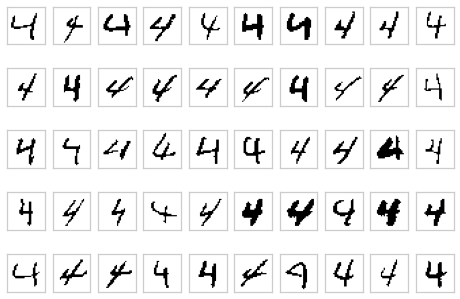

In [45]:
show_images_by_digit(X_train_bin, 4)

In [46]:
bnb = BernoulliNB()
print(np.mean(cross_val_score(bnb,X_train_bin,y_train,cv=10)))

0.8593249023801581


In [47]:
bnb_model = BernoulliNB().fit(X_train_bin, y_train)

In [48]:
print(classification_report(bnb_model.predict(X_test_bin), y_test,target_names=['4', '7', '9']))

              precision    recall  f1-score   support

           4       0.82      0.89      0.86       231
           7       0.88      0.92      0.90       238
           9       0.87      0.78      0.82       286

    accuracy                           0.86       755
   macro avg       0.86      0.87      0.86       755
weighted avg       0.86      0.86      0.86       755



Podemos observar que el modelo Naive Bayes Gaussiano no funciona muy bien, con una accuracy de 59%. En cambio, tras binarizar y ajustar el Naive Bayes Bernoulli la accuracy aumenta hasta el 85%. Esto probablemente se deba a que hemos asumido que los píxeles se distribuían de forma gaussiana erróneamente. Al binarizarlos, los hemos acercado a una distribución de bernoulli, y por esta razón ha funcionado mejor el clasificador.

c) En esta aplicación la calidad del modelo es bastante importante y es probable que las fronteras entre los dígitos sean complejas. Ajusta un modelo k nearest neighbours a la matriz
original y la binarizada explorando adecuadamente los hiperparámetros de este modelo.
Comenta los resultados

In [49]:
import pandas as pd
from pandas import read_csv

import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score, TimeSeriesSplit

from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.classifier import precision_recall_curve

from apafib import load_electric_devices, load_energy

import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
# sns.set()
pd.set_option('display.precision', 3)

In [50]:
knn =  KNeighborsClassifier()
print(np.mean(cross_val_score(knn,X_train,y_train,cv=10)))

0.9685404116712123


In [55]:
param = {'n_neighbors':[1, 3, 5, 7, 11, 15], 
          'weights':['distance', 'uniform'], 
          'leaf_size':[1, 5, 10, 20, 30],
          'metric': ['l2', 'l1', 'cosine']}

knn_gs =  GridSearchCV(knn,param,cv=2, n_jobs=-1)
knn_gs.fit(X_train, y_train);

In [56]:
print(classification_report(knn_gs.predict(X_test), y_test,target_names=['4', '7', '9']))

              precision    recall  f1-score   support

           4       0.95      1.00      0.97       239
           7       0.96      0.98      0.97       245
           9       0.98      0.92      0.95       271

    accuracy                           0.97       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.97      0.97      0.97       755



In [57]:
param = {'n_neighbors':[1, 3, 5, 7, 11, 15], 
          'weights':['distance', 'uniform'], 
          'leaf_size':[1, 5, 10, 20, 30],
          'metric': ['l2', 'l1', 'cosine']}

knn_gs_bin =  GridSearchCV(knn,param,cv=2, n_jobs=-1)
knn_gs_bin.fit(X_train_bin, y_train);

In [58]:
print(classification_report(knn_gs.predict(X_test_bin), y_test,target_names=['4', '7', '9']))

              precision    recall  f1-score   support

           4       0.96      0.99      0.98       242
           7       0.97      0.98      0.98       248
           9       0.98      0.94      0.96       265

    accuracy                           0.97       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.97      0.97      0.97       755



d) Habrás observado al hacer el PCA que el número de componentes necesario para explicar la variancia de los datos no es muy grande respecto a su dimensionalidad real. Elige
un número de componentes, obtén las matrices de datos transformadas. Ajusta un modelo
Naïve Bayes y un K nearest neighbours a estos datos explorando adecuadamente sus hiperparámetros. Evalúa la calidad de los modelos. ¿Por qué sería más adecuado usar el Naïve
Bayes con esta transformación? ¿Qué ventajas/inconvenientes tendría el trabajar con los
datos transformados? ¿Qué modelo de entre todos elegirías para reconocer códigos postales? Razona tu respuesta.

In [ ]:
from sklearn.decomposition import PCA
myPCA = PCA(.8).fit(X_train);

In [ ]:
X_train_PCA = myPCA.transform(X_train)
X_test_PCA = myPCA.transform(X_test)

In [ ]:
gnb = GaussianNB()
print(np.mean(cross_val_score(gnb,X_train_PCA,y_train,cv=10)))

0.88435580715421


In [ ]:
gnb_model = GaussianNB().fit(X_train_PCA, y_train)

print('Priors:', gnb_model.class_prior_)

Priors: [0.31590607 0.34847142 0.33562251]


In [ ]:
print(classification_report(gnb_model.predict(X_test_PCA), y_test,target_names=['4', '7', '9']))

              precision    recall  f1-score   support

           4       0.90      0.89      0.89       251
           7       0.91      0.93      0.92       243
           9       0.87      0.85      0.86       261

    accuracy                           0.89       755
   macro avg       0.89      0.89      0.89       755
weighted avg       0.89      0.89      0.89       755



In [53]:
param = {'n_neighbors':[1, 3, 5, 7, 11, 15], 
          'weights':['distance', 'uniform'], 
          'leaf_size':[1, 5, 10, 20, 30],
          'metric': ['l2', 'l1', 'cosine']}

knn_gs_pca =  GridSearchCV(knn,param,cv=5, n_jobs=-1)
knn_gs_pca.fit(X_train_PCA, y_train);

In [54]:
print(classification_report(knn_gs_pca.predict(X_test_PCA), y_test,target_names=['4', '7', '9']))

              precision    recall  f1-score   support

           4       0.97      0.98      0.98       246
           7       0.97      0.98      0.98       248
           9       0.97      0.95      0.96       261

    accuracy                           0.97       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.97      0.97      0.97       755

